In [49]:
from tensorflow.keras.datasets import mnist

In [50]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [51]:
x_train = x_train.reshape(x_train.shape[0],28*28)
x_test = x_test.reshape(x_test.shape[0],28*28)
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype('float32')/255.0

In [52]:
from sklearn.preprocessing import LabelBinarizer

In [53]:
lb = LabelBinarizer()#categorical to binary

In [54]:
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [56]:
model = Sequential()
model.add(Dense(128,input_shape=(784,),activation="sigmoid")) #imp
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [57]:
from tensorflow.keras.optimizers import SGD

In [58]:
sgd = SGD(0.01)

In [59]:
model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])
H = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2854 - accuracy: 0.1755 - val_loss: 2.2532 - val_accuracy: 0.1901
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 2.2279 - accuracy: 0.3529 - val_loss: 2.1970 - val_accuracy: 0.3769
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 2.1639 - accuracy: 0.4735 - val_loss: 2.1205 - val_accuracy: 0.4977
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 2.0730 - accuracy: 0.5450 - val_loss: 2.0092 - val_accuracy: 0.5692
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 1.9427 - accuracy: 0.5886 - val_loss: 1.8536 - val_accuracy: 0.6030
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 1.7710 - accuracy: 0.6208 - val_loss: 1.6635 - val_accuracy: 0.6658
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 1.5782 - accuracy: 0.6597 - val_loss: 1.4680 - val_accuracy: 0.6918
Epoch 

In [60]:
predictions = model.predict(x_test,batch_size=128)

79/79 [==============================] - 0s 2ms/step


In [61]:
from sklearn.metrics import classification_report 

In [62]:
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       980
           1       0.77      0.99      0.87      1135
           2       0.85      0.72      0.78      1032
           3       0.66      0.82      0.73      1010
           4       0.72      0.91      0.80       982
           5       0.88      0.40      0.55       892
           6       0.83      0.91      0.87       958
           7       0.78      0.87      0.82      1028
           8       0.79      0.51      0.62       974
           9       0.81      0.59      0.68      1009

    accuracy                           0.77     10000
   macro avg       0.79      0.77      0.76     10000
weighted avg       0.79      0.77      0.76     10000



In [63]:
import matplotlib.pyplot as plt
import numpy as np

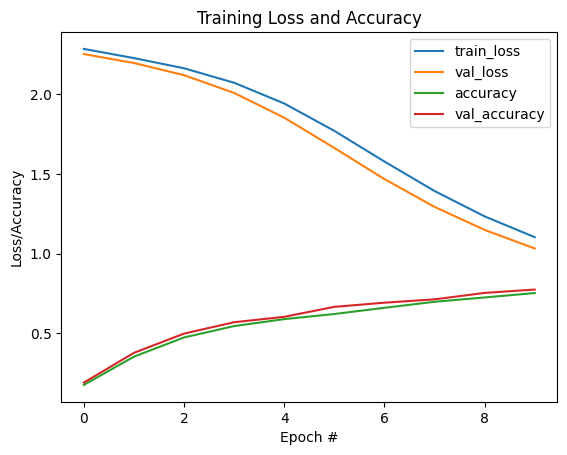

In [64]:
plt.plot(np.arange(0,10),H.history["loss"],label='train_loss')
plt.plot(np.arange(0,10),H.history["val_loss"],label='val_loss')
plt.plot(np.arange(0,10),H.history["accuracy"],label='accuracy')
plt.plot(np.arange(0,10),H.history["val_accuracy"],label='val_accuracy')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
